<a href="https://colab.research.google.com/github/zahranicp/hands-on-ML2/blob/main/chapter06/Chapter06_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# impor library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [2]:
# Ambil fitur petal length dan width
data_iris = load_iris()
fitur_terpilih = data_iris.data[:, 2:]  # hanya fitur ke-3 dan 4
label_kelas = data_iris.target


In [3]:
# Buat dan latih model pohon keputusan dengan kedalaman maksimum 2
model_pohon = DecisionTreeClassifier(max_depth=2, random_state=42)
model_pohon.fit(fitur_terpilih, label_kelas)


DecisionTreeClassifier(max_depth=2, random_state=42)

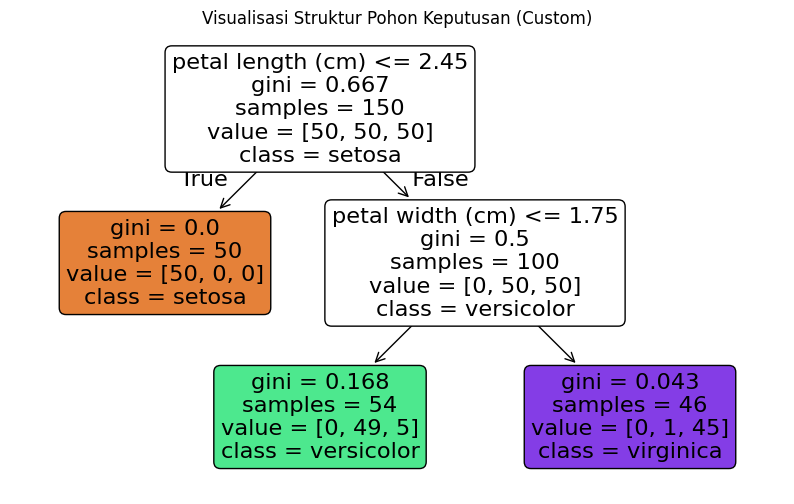

In [4]:
plt.figure(figsize=(10, 6))
plot_tree(model_pohon,
          feature_names=data_iris.feature_names[2:],
          class_names=data_iris.target_names,
          filled=True, rounded=True)
plt.title("Visualisasi Struktur Pohon Keputusan (Custom)")
plt.show()


In [5]:
# Prediksi probabilitas dan kelas
sample = [[5.0, 1.5]]
proba = model_pohon.predict_proba(sample)
prediksi = model_pohon.predict(sample)

print("Probabilitas Prediksi:", proba)
print("Kelas yang Diprediksi:", data_iris.target_names[prediksi[0]])


Probabilitas Prediksi: [[0.         0.90740741 0.09259259]]
Kelas yang Diprediksi: versicolor


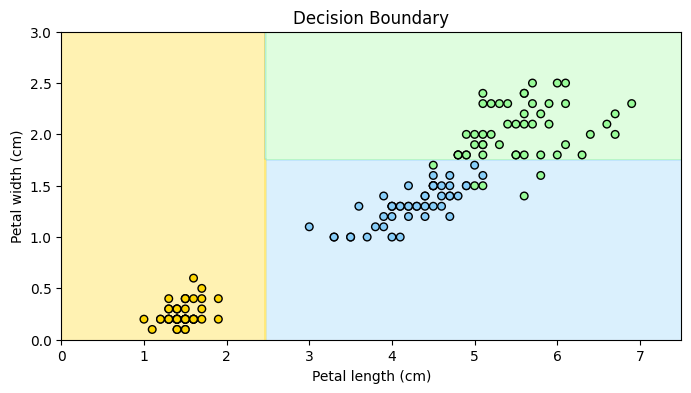

In [6]:
from matplotlib.colors import ListedColormap

def tampilkan_batas_keputusan(model, X, y, axes=[0, 7.5, 0, 3], judul="Decision Boundary"):
    cmap = ListedColormap(['#FFD700', '#87CEFA', '#98FB98'])
    x1 = np.linspace(axes[0], axes[1], 200)
    x2 = np.linspace(axes[2], axes[3], 200)
    xx1, xx2 = np.meshgrid(x1, x2)
    X_grid = np.c_[xx1.ravel(), xx2.ravel()]
    y_pred = model.predict(X_grid).reshape(xx1.shape)

    plt.figure(figsize=(8, 4))
    plt.contourf(xx1, xx2, y_pred, cmap=cmap, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor="k", s=30)
    plt.xlabel("Petal length (cm)")
    plt.ylabel("Petal width (cm)")
    plt.title(judul)
    plt.axis(axes)
    plt.show()

# Tampilkan decision boundary
tampilkan_batas_keputusan(model_pohon, fitur_terpilih, label_kelas)


In [7]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier

# Generate data moons
X_moon, y_moon = make_moons(n_samples=100, noise=0.25, random_state=53)

# Dua model: tanpa regularisasi dan dengan min_samples_leaf=5
tree_bebas = DecisionTreeClassifier(random_state=42)
tree_regulasi = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

tree_bebas.fit(X_moon, y_moon)
tree_regulasi.fit(X_moon, y_moon)


DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [8]:
def tampilkan_boundary_moons(model, X, y, title, ax):
    cmap = ListedColormap(['#FF9999', '#9999FF'])
    x1 = np.linspace(-2, 3, 300)
    x2 = np.linspace(-1.5, 2, 300)
    xx1, xx2 = np.meshgrid(x1, x2)
    X_grid = np.c_[xx1.ravel(), xx2.ravel()]
    y_pred = model.predict(X_grid).reshape(xx1.shape)

    ax.contourf(xx1, xx2, y_pred, cmap=cmap, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolor="k", s=20)
    ax.set_title(title)
    ax.set_xlim(-2, 3)
    ax.set_ylim(-1.5, 2)


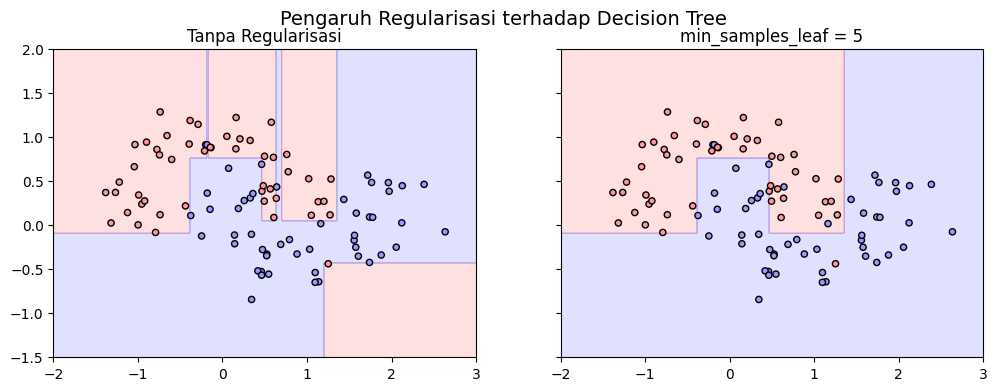

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
tampilkan_boundary_moons(tree_bebas, X_moon, y_moon, "Tanpa Regularisasi", axs[0])
tampilkan_boundary_moons(tree_regulasi, X_moon, y_moon, "min_samples_leaf = 5", axs[1])
plt.suptitle("Pengaruh Regularisasi terhadap Decision Tree", fontsize=14)
plt.show()


In [10]:
# Matriks rotasi sudut 20 derajat
angle_rad = np.pi / 180 * 20  # ~20 derajat
rotasi = np.array([
    [np.cos(angle_rad), -np.sin(angle_rad)],
    [np.sin(angle_rad), np.cos(angle_rad)]
])

# Rotasi data fitur
fitur_rotasi = fitur_terpilih.dot(rotasi)

# Latih decision tree baru dengan data yang sudah dirotasi
pohon_rotasi = DecisionTreeClassifier(max_depth=2, random_state=42)
pohon_rotasi.fit(fitur_rotasi, label_kelas)


DecisionTreeClassifier(max_depth=2, random_state=42)

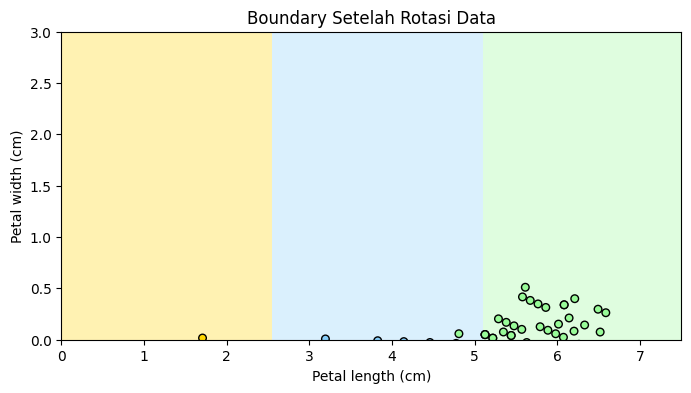

In [11]:
# Gunakan fungsi sebelumnya, tapi untuk data yang dirotasi
tampilkan_batas_keputusan(pohon_rotasi, fitur_rotasi, label_kelas,
                          judul="Boundary Setelah Rotasi Data")


In [12]:
# Dataset: y = 4(x - 0.5)^2 + noise
np.random.seed(42)
m = 200
X_reg = np.random.rand(m, 1)
y_reg = 4 * (X_reg - 0.5)**2 + np.random.randn(m, 1) / 10


In [13]:
from sklearn.tree import DecisionTreeRegressor

# Dua model dengan kedalaman berbeda
reg_tree_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
reg_tree_3 = DecisionTreeRegressor(max_depth=3, random_state=42)

reg_tree_2.fit(X_reg, y_reg)
reg_tree_3.fit(X_reg, y_reg)


DecisionTreeRegressor(max_depth=3, random_state=42)

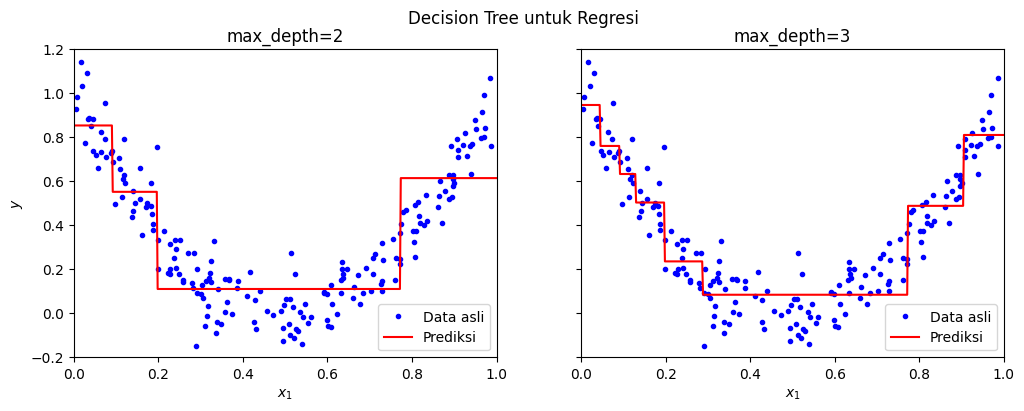

In [14]:
def tampilkan_prediksi_regresi(model, X, y, axes=[0, 1, -0.2, 1.2], label_y="$y$"):
    x_lin = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = model.predict(x_lin)
    plt.plot(X, y, "b.", label="Data asli")
    plt.plot(x_lin, y_pred, "r-", label="Prediksi")
    plt.xlabel("$x_1$")
    if label_y:
        plt.ylabel(label_y)
    plt.axis(axes)
    plt.legend()

# Plot dua model
fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
plt.sca(axs[0])
tampilkan_prediksi_regresi(reg_tree_2, X_reg, y_reg)
plt.title("max_depth=2")

plt.sca(axs[1])
tampilkan_prediksi_regresi(reg_tree_3, X_reg, y_reg, label_y=None)
plt.title("max_depth=3")
plt.suptitle("Decision Tree untuk Regresi")
plt.show()


In [17]:
# Tanpa regularisasi
reg_bebas = DecisionTreeRegressor(random_state=42)

# Dengan regulasi
reg_teratur = DecisionTreeRegressor(min_samples_leaf=10, random_state=42)

reg_bebas.fit(X_reg, y_reg)
reg_teratur.fit(X_reg, y_reg)


DecisionTreeRegressor(min_samples_leaf=10, random_state=42)

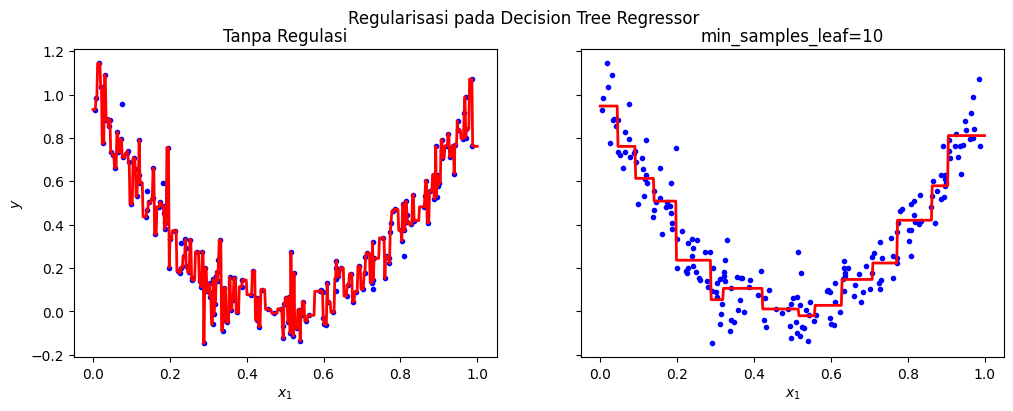

In [18]:
x_test = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred_bebas = reg_bebas.predict(x_test)
y_pred_regulasi = reg_teratur.predict(x_test)

fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# Tanpa regulasi
plt.sca(axs[0])
plt.plot(X_reg, y_reg, "b.", label="Data")
plt.plot(x_test, y_pred_bebas, "r-", linewidth=2)
plt.title("Tanpa Regulasi")
plt.xlabel("$x_1$")
plt.ylabel("$y$")

# Dengan regulasi
plt.sca(axs[1])
plt.plot(X_reg, y_reg, "b.")
plt.plot(x_test, y_pred_regulasi, "r-", linewidth=2)
plt.title("min_samples_leaf=10")
plt.xlabel("$x_1$")

plt.suptitle("Regularisasi pada Decision Tree Regressor")
plt.show()


In [19]:
from sklearn.model_selection import cross_val_score

param_combos = [
    {"criterion": "gini", "max_depth": 2},
    {"criterion": "entropy", "max_depth": 2},
    {"criterion": "gini", "max_depth": 5, "min_samples_leaf": 5},
    {"criterion": "entropy", "max_depth": None, "min_samples_split": 10}
]

for params in param_combos:
    model = DecisionTreeClassifier(random_state=42, **params)
    scores = cross_val_score(model, fitur_terpilih, label_kelas, cv=5)
    print(f"Params: {params}, Akurasi rata-rata: {scores.mean():.3f}")


Params: {'criterion': 'gini', 'max_depth': 2}, Akurasi rata-rata: 0.933
Params: {'criterion': 'entropy', 'max_depth': 2}, Akurasi rata-rata: 0.933
Params: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5}, Akurasi rata-rata: 0.940
Params: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 10}, Akurasi rata-rata: 0.967


In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_leaf_nodes": list(range(2, 20)),
    "min_samples_split": [2, 3, 4],
    "criterion": ["gini", "entropy"]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3, verbose=1)
grid_search.fit(fitur_terpilih, label_kelas)

print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best params: {'criterion': 'gini', 'max_leaf_nodes': 7, 'min_samples_split': 4}
Best score: 0.9733333333333333


In [21]:
def train_tree_classifier(X, y, depth=2, crit='gini', leaf=None):
    clf = DecisionTreeClassifier(max_depth=depth,
                                 criterion=crit,
                                 min_samples_leaf=leaf,
                                 random_state=42)
    clf.fit(X, y)
    return clf

def show_tree_structure(model, feat_names, class_names):
    plt.figure(figsize=(10, 6))
    plot_tree(model, feature_names=feat_names, class_names=class_names,
              filled=True, rounded=True)
    plt.title("Struktur Pohon Keputusan")
    plt.show()


# Exercise

In [22]:
from sklearn.datasets import make_moons

# Dataset bulan sabit
X_moon, y_moon = make_moons(n_samples=10_000, noise=0.4, random_state=42)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_moon, y_moon, test_size=0.2, random_state=42)


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Coba berbagai nilai max_leaf_nodes
param_grid = {
    "max_leaf_nodes": list(range(5, 50, 5)),
    "min_samples_split": [2, 4],
    "criterion": ["gini", "entropy"]
}

grid_search_tree = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    verbose=1,
    n_jobs=-1
)

grid_search_tree.fit(X_train, y_train)

print("Best parameter:", grid_search_tree.best_params_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameter: {'criterion': 'gini', 'max_leaf_nodes': 20, 'min_samples_split': 2}


In [26]:
from sklearn.metrics import accuracy_score

# Model terbaik dari hasil grid search
final_model = grid_search_tree.best_estimator_

# Evaluasi test set
y_pred_test = final_model.predict(X_test)
acc = accuracy_score(y_test, y_pred_test)
print(f"Akurasi pada test set: {acc:.4f}")


Akurasi pada test set: 0.8700


In [27]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
subset_size = 100
mini_sets = []

shuffler = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - subset_size, random_state=42)
for idx_train, _ in shuffler.split(X_train):
    mini_sets.append((X_train[idx_train], y_train[idx_train]))


In [28]:
from sklearn.base import clone

forest_models = []
for X_mini, y_mini in mini_sets:
    tree = clone(final_model)
    tree.fit(X_mini, y_mini)
    forest_models.append(tree)


In [31]:
import numpy as np
from scipy.stats import mode

# Voting dari 1000 tree
all_preds = np.array([tree.predict(X_test) for tree in forest_models])
y_majority_vote, _ = mode(all_preds, axis=0)

# Evaluasi hasil ensemble
acc_ensemble = accuracy_score(y_test, y_majority_vote.ravel())
print(f"Akurasi Ensemble (1000 pohon): {acc_ensemble:.4f}")


Akurasi Ensemble (1000 pohon): 0.8720


In [32]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

def plot_decision_boundary(model, X, y, title="", ax=None):
    if ax is None:
        ax = plt.gca()

    # Set warna background
    cmap_light = ListedColormap(['#FFEEEE', '#EEEEFF'])
    cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

    # Grid prediksi
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 300),
                         np.linspace(x2_min, x2_max, 300))
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    pred = model.predict(X_grid).reshape(xx.shape)

    # Plot contour dan titik data
    ax.contourf(xx, yy, pred, cmap=cmap_light, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=15)
    ax.set_title(title)


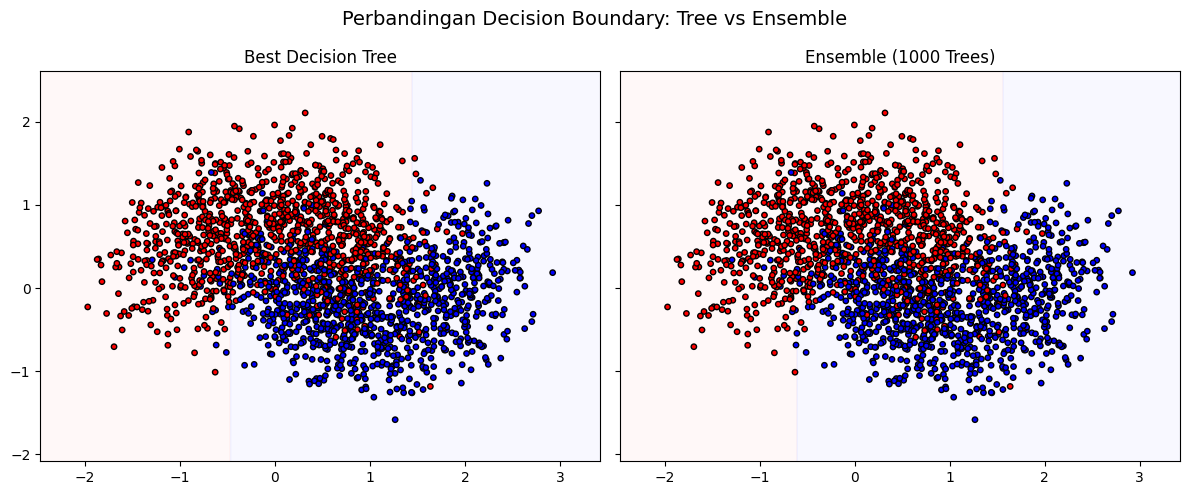

In [33]:
# Model hasil grid search terbaik
model_tree = final_model

# Model ensemble (pakai fungsi mode dari 1000 prediksi)
class MajorityVoteClassifier:
    def __init__(self, classifiers):
        self.classifiers = classifiers

    def predict(self, X):
        all_preds = np.array([clf.predict(X) for clf in self.classifiers])
        voted, _ = mode(all_preds, axis=0)
        return voted.ravel()

# Model voting ensemble
model_ensemble = MajorityVoteClassifier(forest_models)

# Plot kedua model
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

plot_decision_boundary(model_tree, X_test, y_test, title="Best Decision Tree", ax=axs[0])
plot_decision_boundary(model_ensemble, X_test, y_test, title="Ensemble (1000 Trees)", ax=axs[1])

plt.suptitle("Perbandingan Decision Boundary: Tree vs Ensemble", fontsize=14)
plt.tight_layout()
plt.show()
